# GENERATING MACHINE LEARNING MODEL

In this kernel, we will generate a machine learning model decision tree. Some  data preparation tasks need to be performed first as follows:
1. Replace null values with median of that column.
2. Convert categorical variables to numerical variables.
3. Prepare training dan test data.

The kernel is based on Kaggle Tutorial: EDA & Machine Learning and Kaggle Tutorial: Your First Machine Learning Model by Hugo-Brown Anderson.

In this tutorial, we will generate a decision tree model of Titanic dataset to predict the survival of its passengers.

We will use the decision tree implementation from a machine learning library, Scikit Learn.

You may need to download and install some libraries e.g. sklearn, seaborn etc. You can use the pip instruction to install the required libraries.

Import data and check it out.

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

Read the dataset.

In [ ]:
# Import data
df_train = pd.read_csv('data/train-1.csv')

Let us see what we have in the dataset. We will print the first 3 rows of the data.

In [ ]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 1. First, we need to do some preprocessing on the dataset. 

Do some preprocessing to the dataset. We need to temporarily remove the target class, `Survived`, from the dataset.

But first, you'll store the target variable of the training data for safe keeping.

In [ ]:
# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Drop the Survived column
data = df_train.drop(['Survived'], axis=1)

Check out your new DataFrame data using the `info()` method.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 11 columns):
PassengerId    871 non-null int64
Pclass         871 non-null int64
Name           871 non-null object
Sex            871 non-null object
Age            696 non-null float64
SibSp          871 non-null int64
Parch          871 non-null int64
Ticket         871 non-null object
Fare           871 non-null float64
Cabin          199 non-null object
Embarked       869 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 74.9+ KB


Some numerical variables have missing values, `Age` and `Fare`. Some categorical variables are also have missing values; `Cabin` and `Embarked`.

Now we will focus on fixing the numerical variables: you will impute or fill in the missing values for those columns, using the median of these variables where you know them. Impute is a process to remove null values in your dataset by replacing them with other values.

Note that in this case, you use the median because it's perfect for dealing with outliers. In other words, the median is useful to use when the distribution of data is skewed. Other ways to impute the missing values would be to use the mean, which you can find by adding all data points and dividing by the number of data points, or mode, which is the number that occurs the highest number of times.

In [ ]:
# fill missing values with median column values
data.fillna(data.median(), inplace=True)

Now check out the modified data. You can see all the numerical variables are now consists of non-null numerical values.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 11 columns):
PassengerId    871 non-null int64
Pclass         871 non-null int64
Name           871 non-null object
Sex            871 non-null object
Age            871 non-null float64
SibSp          871 non-null int64
Parch          871 non-null int64
Ticket         871 non-null object
Fare           871 non-null float64
Cabin          199 non-null object
Embarked       869 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 74.9+ KB


Most machine learning models work input features that are numerical. Hence you want to encode your data with numbers, so you'll want to change 'object' dtypes variables to numbers. You can use the pandas function `.get_dummies()` to do so. The `.get_dummies()` allows you to create a new column for each of the options in categorical variables. 

In this example, we would like to convert the `Sex` attribute to numeric.

In [ ]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
#data = pd.get_dummies(data, columns=['Sex'])

data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


`.get_dummies()` allows you to create a new column for each of the options in 'Sex'. So it creates a new column for `female`, called `'Sex_female'`, and then a new column for `'Sex_male'`, which encodes whether that row was male or female.

Now, because you added the `drop_first` argument in the line of code above, you dropped `'Sex_female'` because, essentially, these new columns, `'Sex_female'` and `'Sex_male'`, encode the same information.

So all you have done is create a new column `'Sex_male'`, which has a 1 if that row is a male - and a 0 if that row is female.

Now, you'll select the columns `['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']` from your DataFrame to build your first machine learning model:

In [ ]:
# Select columns and view head
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 5 columns):
Sex_male    871 non-null uint8
Fare        871 non-null float64
Age         871 non-null float64
Pclass      871 non-null int64
SibSp       871 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 28.1 KB


All the entries are non-null now!

Now, you have got your data in a form to build first machine learning model.

## 2. Build a Decision Tree Classifier

What is a decision tree classifier? It is a tree that allows you to classify data points, which are also known as target variables, based on feature variables.

In this lab, we are using the sklearn tree library to develop our decision tree classifier. Documentation of this library can be found at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

Before fitting a model to your data, we split it into training and test sets.

The training set will be used for the decision tree to learn the dataset. It will output a model or classifier.

The test data will be used to test how good the genefrated classifier is.

Split the dataset into train and test data. Lets set the test size to 0.2.

In [ ]:
# create training and testing vars
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
train_label = survived_train[msk]
test = data[~msk]
test_label = survived_train[~msk]

print('Number of records in dataset: ', len(data))
print('Number of records in training set: ', len(train))
print('Number of frecords in test set: ', len(test))

Number of records in dataset:  871
Number of records in training set:  709
Number of frecords in test set:  162


You'll use scikit-learn, which requires your data as arrays, not DataFrames so transform them:

In [ ]:
X = train.values
y = train_label.values

X_test = test.values
y_test = test_label.values

Now you get to build your decision tree classifier! First create such a model with `max_depth=3` and then fit it your data. Note that you name your model clf, which is short for "Classifier"

In [ ]:
# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The feature variables X is the first argument that you pass to the `.fit()` method, while the target variable, y, is the second argument.

The output tells you all that you need to know about your Decision Tree Classifier that you just built: as such, you see, for example, that the max depth is set at 3.

Now, you'll make predictions on your training set and test set.

In [ ]:
#Compute accuracy on the training set
train_accuracy = clf.score(X, y)

#Compute accuracy on the testing set
test_accuracy = clf.score(X_test, y_test)

print('Training accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Training accuracy:  0.8279266572637518
Test accuracy:  0.845679012345679


In the above code, the test_accuracy stores the accuracy of the generated classifier. named clf, in predicting the survival of the passengers listed in the test set.

You may improve the accuracy by choosing the suitable `max_depth`. 

### What is `max_depth`?

The depth of the tree is known as a hyperparameter, which means a parameter you need to decide before you fit the model to the data. If you choose a larger max_depth, you'll get a more complex decision boundary.

    If your decision boundary is too complex, you can overfit to the data, which means that your model will be describing noise as well as signal.

    If your max_depth is too small, you might be underfitting the data, meaning that your model doesn't contain enough of the signal.

So how  do you identify the best `max_depth`?

One way is to hold out a test set from your training data. You can then fit the model to your training data, make predictions on your test set and see how well your prediction does on the test set. 

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy_train = []
accuracy_test = []

for depth in max_depth_range:    
    clf = tree.DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X, y)    
    score = clf.score(X, y)
    accuracy_train.append(score)
    
    score = clf.score(X_test, y_test)
    accuracy_test.append(score)

In [ ]:
print(accuracy_train)
print(accuracy_test)

[0.7785613540197461, 0.7912552891396333, 0.8194640338504936, 0.8279266572637518, 0.846262341325811]
[0.8209876543209876, 0.8148148148148148, 0.845679012345679, 0.845679012345679, 0.8395061728395061]


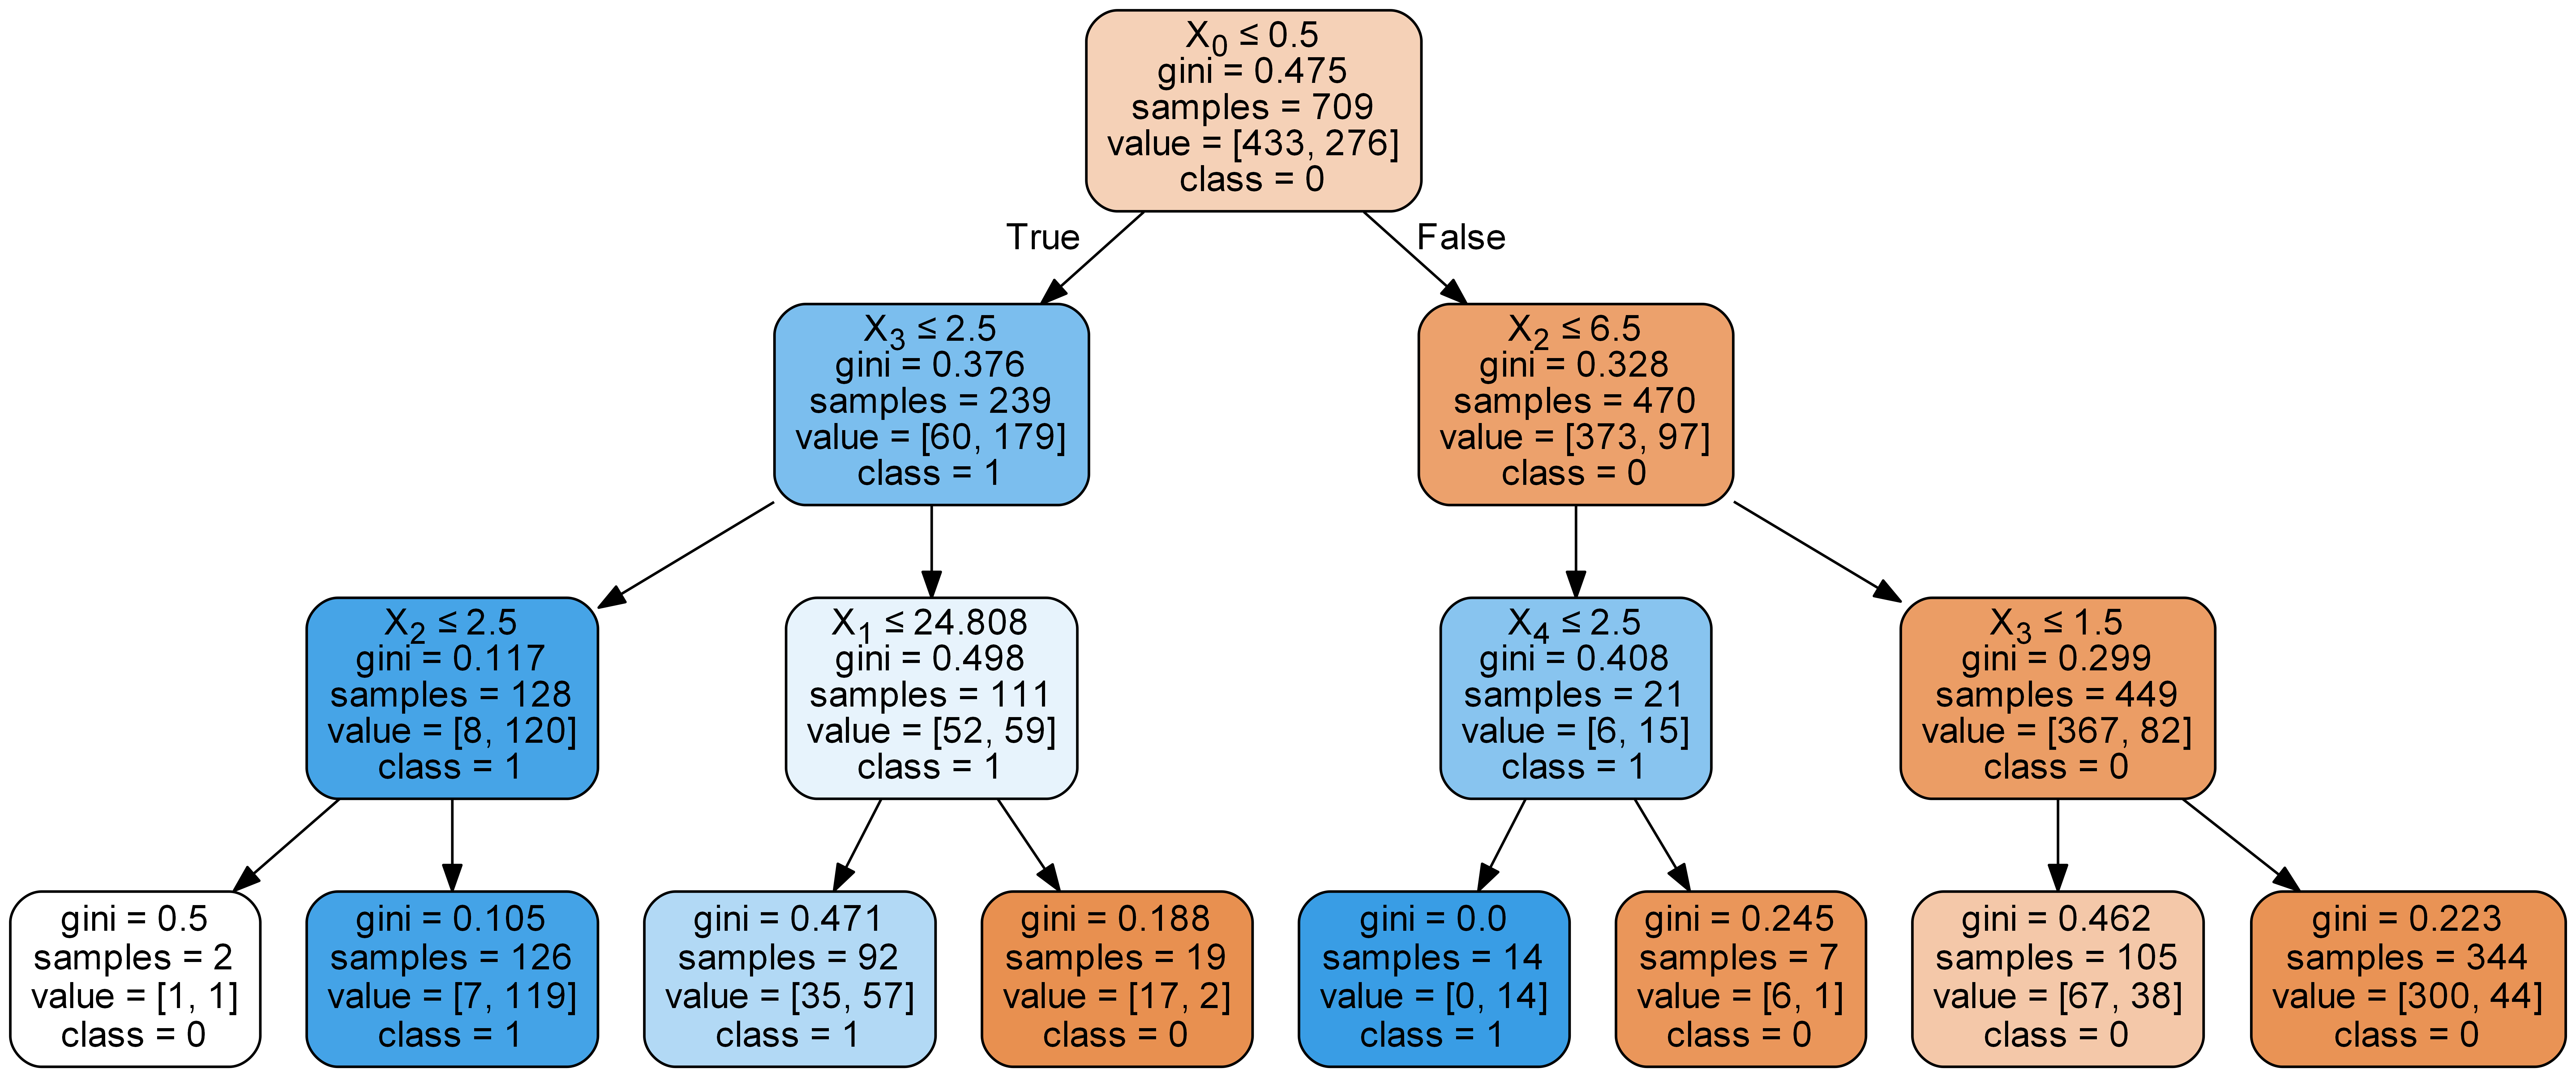

In [ ]:
#@title
#dot_data = StringIO('tree.dot')
from sklearn.tree import export_graphviz
import io
from graphviz import Source

from IPython.display import Image
from IPython.display import SVG
from IPython.display import display

export_graphviz(clf, out_file='tree.dot', filled=True, 
                rounded=True, special_characters=True, class_names=['0','1'])

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#graph = pydotplus.graph_from_dot_data(dot_data)
Image(filename='tree.png')

Next we can visualize the generated decision tree. In this example, you will use the existing plot_tree function in sklearn.

In [ ]:
import sklearn

# Int this cell, we will use the plot_tree() function in the provided in the sklearn package.
plt.figure(figsize=(20,12))
sklearn.tree.plot_tree(clf, filled=True)
plt.show()

In this tutorial, you have:
1. Prepare the data in a form to build a machine learning model.
2. Built a machine learning model using a decision tree classifier.
3. Makes prediction based on the generated model.

# Ungraded assessment

## Predict if the unknown passengers are survived/ not survived.

These are ungraded questions. Different from the previous lab, submission that produced the best accuracy of prediction will be rewarded. You may form a group of two. I will select three winners, which will be determined based on the accuracy of the prediction, correctness of the code and the time that you need to submit your answer. All the submissions must be accompanied by the runnable code that produced the prediction.

Please use the test data provided, 'test-no-label.csv'. Your group are required to predict the 'Survived' label of each of the passenger listed in the test file.

In [ ]:
!pip install graphviz --user